In [17]:
import numpy as np
import matplotlib.pyplot as plt

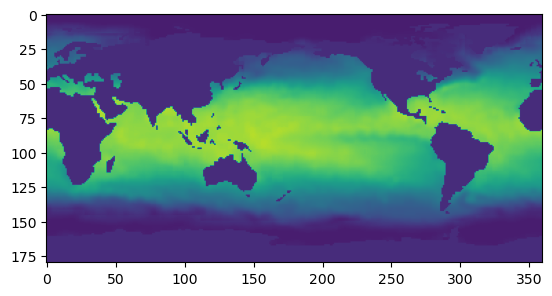

In [18]:
train_data = np.load('sst_var_train',allow_pickle=True).data
mask = np.load('mask',allow_pickle=True)
plt.imshow(train_data[0]*mask[0],vmin=-5,vmax=35)

In [19]:
train_data_ml = train_data.reshape(427,180*360)
mask = mask[0].flatten()
mask = np.asarray(mask,dtype='bool')

train_data_ml = train_data_ml[:,mask]
train_data_ml.shape

# Find train data mean
train_data_mean = np.mean(train_data_ml,axis=0)
train_data_ml = train_data_ml - train_data_mean[None,]

In [20]:
def field_compression(Y,K):
    '''
    Y - Snapshot matrix - shape: NxS
    K - number of modes to truncate to
    returns 
    V - truncated POD basis matrix - shape: NxK
    Ytilde - truncated coefficient matrix - shape: KxS
    '''
    V = generate_pod_bases(Y,K)
    Ytilde = field_coefficients(Y,V)

    return V, Ytilde

def generate_pod_bases(Y,K): #Mean removed
    '''
    Y - Snapshot matrix - shape: NxS
    returns V - truncated POD basis matrix - shape: NxK
    '''
    new_mat = np.matmul(np.transpose(Y),Y)
    w,v = np.linalg.eig(new_mat)

    # plt.figure()
    # plt.semilogy(w[:]/np.sum(w)*100)
    # plt.show()

    # Bases
    V = np.real(np.matmul(Y,v)) 
    trange = np.arange(np.shape(V)[1])
    V[:,trange] = V[:,trange]/np.sqrt(w[:])

    # Truncate phis
    V = V[:,0:K] # Columns are modes

    return V

def field_coefficients(Y,V):
    '''
    Y - Snapshot matrix - shape: NxS
    V - truncated POD basis matrix - shape: NxK
    returns Ytilde - shape: KxS
    '''
    return np.matmul(np.transpose(V),Y)

In [21]:
modes, coeffs = field_compression(train_data_ml.T,5)

c:\Anaconda\envs\hqr\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


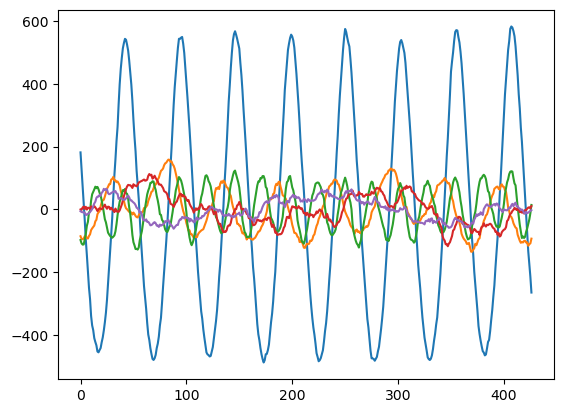

In [22]:
plt.figure()
plt.plot(coeffs[0,:])
plt.plot(coeffs[1,:])
plt.plot(coeffs[2,:])
plt.plot(coeffs[3,:])
plt.plot(coeffs[4,:])
plt.show()

In [23]:
recon_data_ml = np.matmul(modes,coeffs).T

In [24]:
recon_data_ml = recon_data_ml + train_data_mean[None,]

In [25]:
recon_data = np.copy(train_data)
recon_data = recon_data.reshape(427,180*360)

In [26]:
recon_data[:,mask] = recon_data_ml

In [27]:
recon_data = recon_data.reshape(427,180,360)

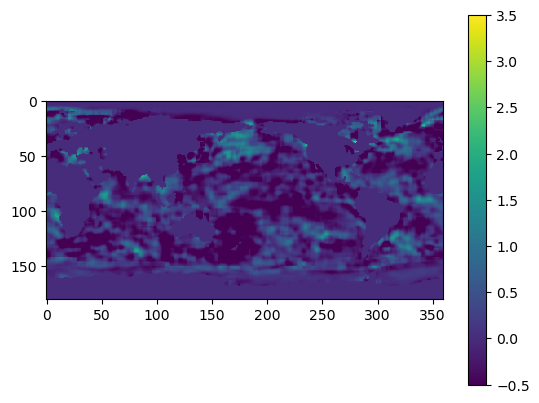

In [28]:
mask = np.load('mask',allow_pickle=True)
ii = 0
plt.figure()
plt.imshow((train_data[ii]-recon_data[ii])*mask[0],vmin=-0.5,vmax=3.5)
plt.colorbar()
plt.show()